In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
import keras 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,mean_squared_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from keras import regularizers
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Using TensorFlow backend.


In [2]:
data_file = os.path.join('Data','iris.csv') # import data file and check first 5 records
print(data_file)
df = pd.read_csv(data_file)
df.head()

Data/iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
print(df.shape)

(150, 5)


In [6]:
 df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Checking out of missing data

In [10]:
df.isnull().values.any()

False

In [11]:
df.isna().values.any()

False

In [12]:
# Separately charts of Sepals and petals

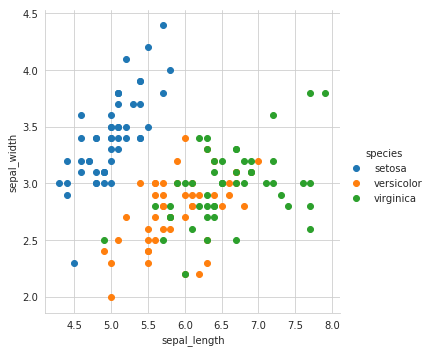

In [13]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(plt.scatter, 'sepal_length', 'sepal_width')\
   .add_legend();
plt.show()

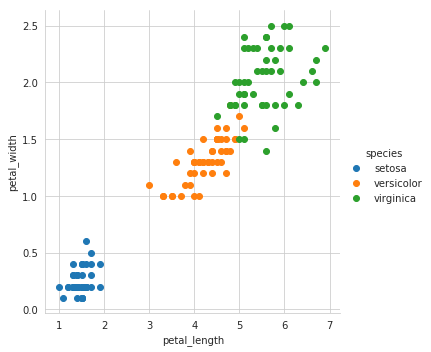

In [14]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(plt.scatter, 'petal_length', 'petal_width')\
   .add_legend();
plt.show()

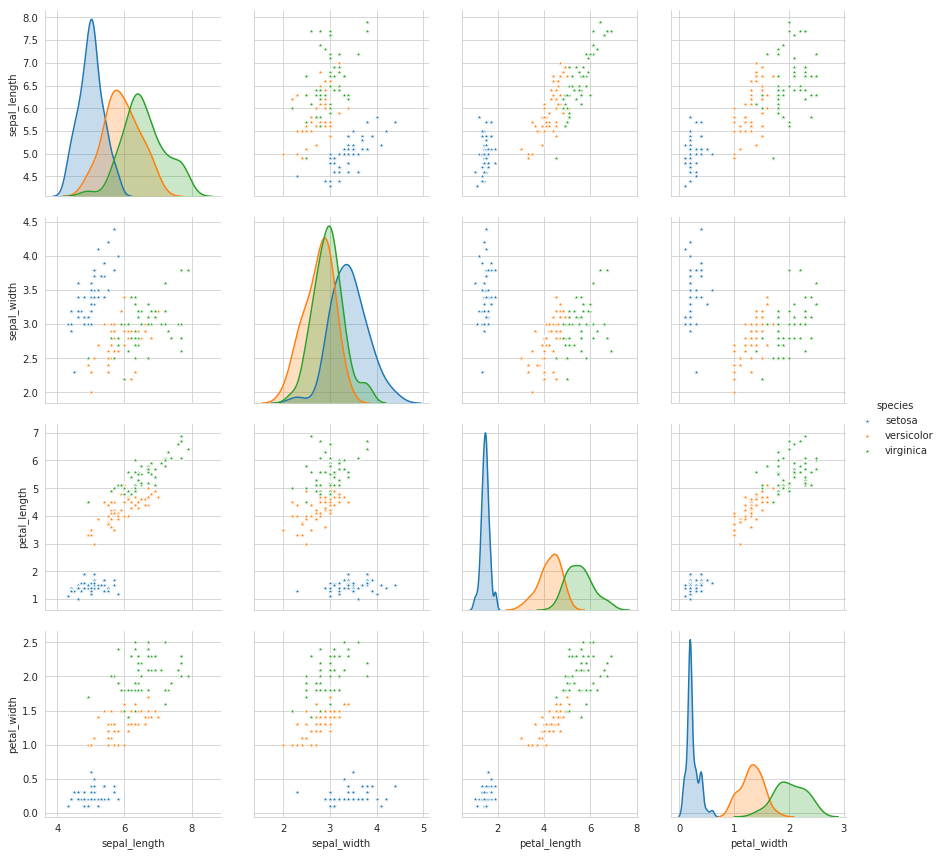

In [15]:
sns.pairplot(df, hue="species", height=3, diag_kind="kde", markers='*');

In [16]:
# Distributions of every features in data

In [17]:
# Petal_length

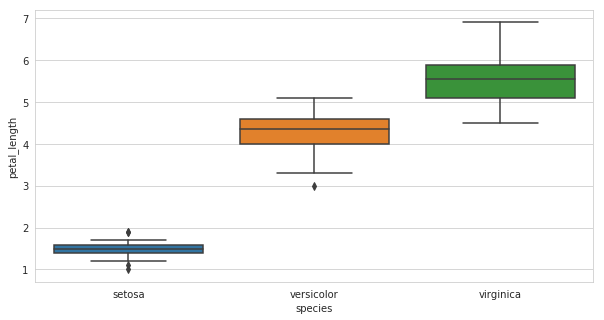

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x= 'species', y= 'petal_length', data= df)
plt.show()

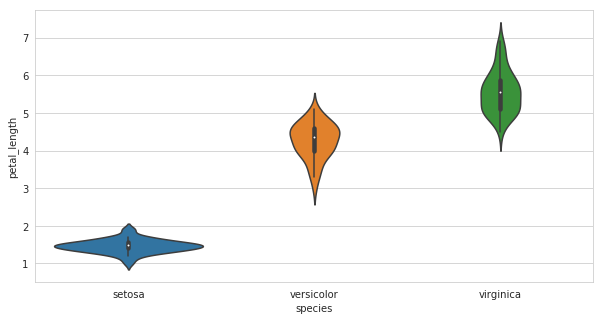

In [19]:
plt.figure(figsize=(10,5))
sns.violinplot(x= 'species', y= 'petal_length', data= df)
plt.show()

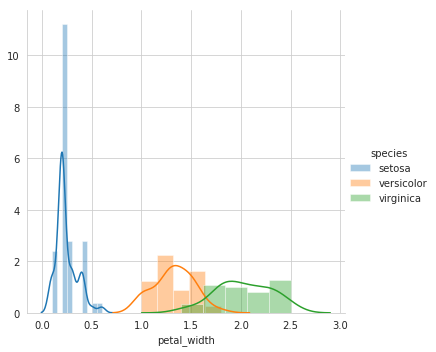

In [20]:
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(sns.distplot, "petal_width")\
   .add_legend()
plt.show()

In [21]:
# Petal_width

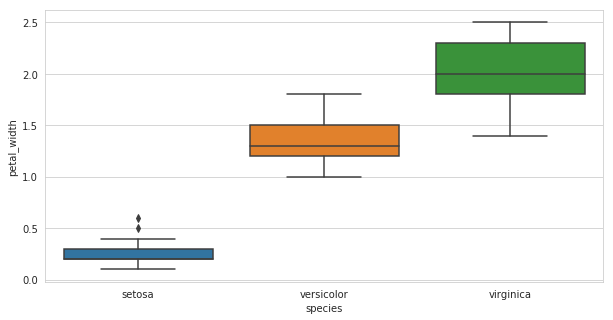

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x= 'species', y= 'petal_width', data= df)
plt.show()

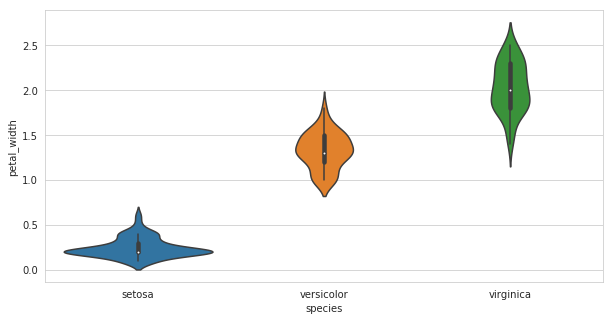

In [23]:
plt.figure(figsize=(10,5))
sns.violinplot(x= 'species', y= 'petal_width', data= df)
plt.show()

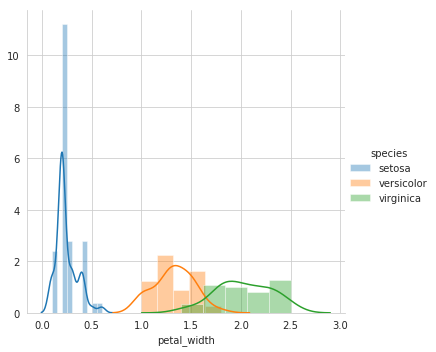

In [24]:
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(sns.distplot, "petal_width")\
   .add_legend()
plt.show()

In [25]:
#sepal_width

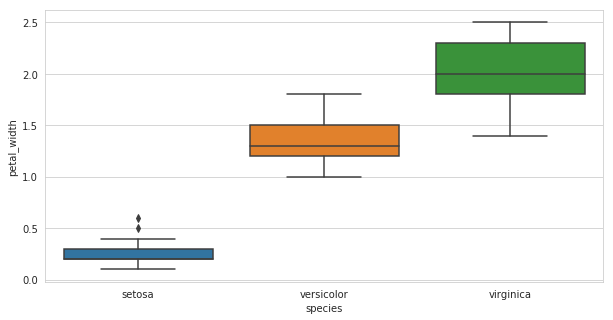

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x= 'species', y= 'petal_width', data= df)
plt.show()

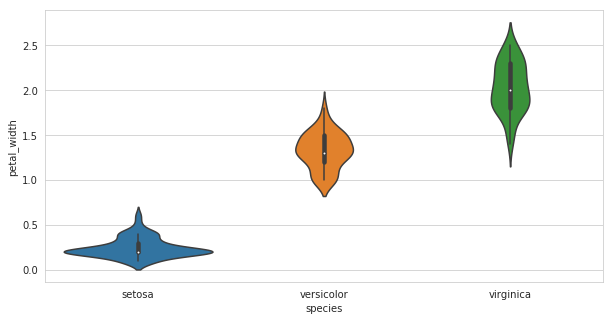

In [27]:
plt.figure(figsize=(10,5))
sns.violinplot(x= 'species', y= 'petal_width', data= df)
plt.show()

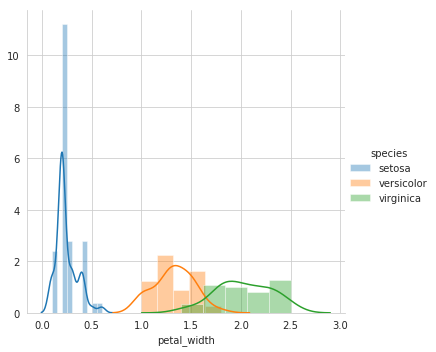

In [28]:
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(sns.distplot, "petal_width")\
   .add_legend()
plt.show()

In [29]:
# Sepal_length

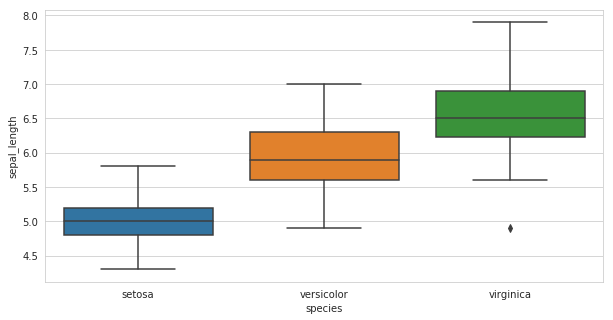

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x= 'species', y= 'sepal_length', data= df)
plt.show()

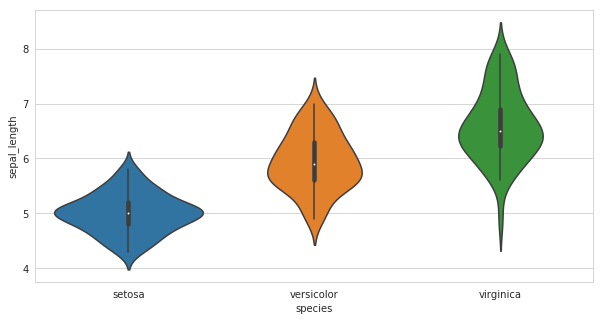

In [31]:
plt.figure(figsize=(10,5))
sns.violinplot(x= 'species', y= 'sepal_length', data= df)
plt.show()

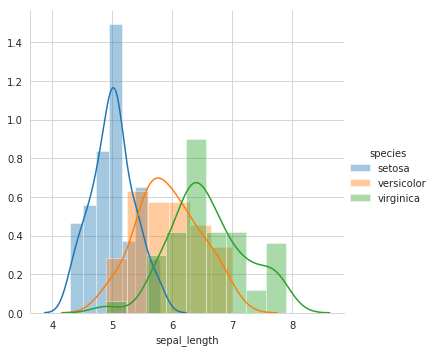

In [32]:
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(sns.distplot, "sepal_length")\
   .add_legend()
plt.show()

In [33]:
df_lc=df
df_lc.loc[df_lc["species"]=="setosa","species"]=0
df_lc.loc[df_lc["species"]=="versicolor","species"]=1
df_lc.loc[df_lc["species"]=="virginica","species"]=2
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


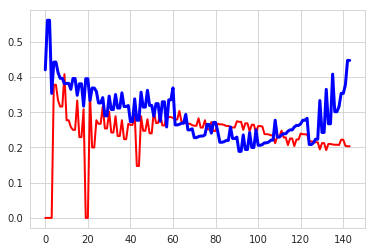

In [34]:
model = LogisticRegression(solver='lbfgs')
train_errors, val_errors = [], []
X= df_lc.iloc[:, 0:4]
y= df_lc.iloc[:, 4]
for i in range(3, len(df['species'])-3):
    test_size_now=i/(len(df['species']))
    test_size_now=1 - round(test_size_now, 2)
    X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = test_size_now, random_state = 1, stratify=y)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_test))
plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='train')
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
del val_errors, train_errors, X, y

In [35]:
#Learning curve from all data is not reliable, 
#because there are small amount of data for three species.

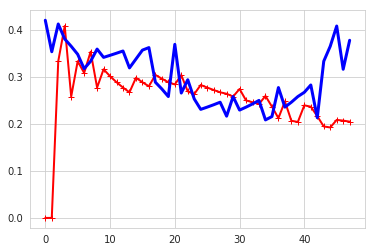

In [36]:
model = LogisticRegression(solver='lbfgs')
train_errors, val_errors = [], []
X= df_lc.iloc[:, 0:4]
y= df_lc.iloc[:, 4]
for i in range(3, len(df['species'])-3,3):
    test_size_now=i/(len(df['species']))
    test_size_now=1 - round(test_size_now, 2)
    X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = test_size_now, random_state = 1, stratify=y)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_test))
plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
del val_errors, train_errors, X, y

In [37]:
#Too small amount of data to watch a smooth learning curve, but 
#there minimum between 35 and 43 so it could be optimal to
#slice at 5 pieces in cross validation with species separation,
#without regularization

In [38]:
X= df.iloc[:, 0:4]
y= df.iloc[:, 4]
X_train_all,X_test_all,y_train_all,y_test_all= train_test_split(X, y, test_size = 0.20, random_state = 1, stratify=y) 

In [39]:
print('train samples', len(X_train_all),', test samples', len(X_test_all))

train samples 120 , test samples 30


In [40]:
y_test_all.value_counts()

2    10
1    10
0    10
Name: species, dtype: int64

In [41]:
y_train_all.value_counts()

2    40
1    40
0    40
Name: species, dtype: int64

In [42]:
#spread data with an equal number of samples in every simple class. 
#This step avoid problem with unrepresentative data

 Min at real number of samples:  0  Validation error equals: 0.983192080250175


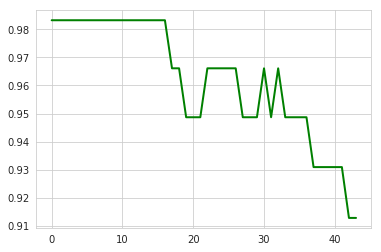

In [43]:
train_accuracy = []
acc = 0
for i in range(1,45):
    model_lr = KNeighborsClassifier(n_neighbors=i)
    model_lr.fit(X_train_all, y_train_all)
    pred_lr = model_lr.predict(X_test_all)
    train_accuracy.append(np.sqrt(accuracy_score(y_test_all, pred_lr)))
    acc=0  
plt.plot(train_accuracy, 'g-', linewidth=2, label='train')
print(' Min at real number of samples: ',np.argmax(train_accuracy), ' Validation error equals:', train_accuracy[np.argmax(train_accuracy)] )

In [44]:
#Check results with hard and soft voting classifier

In [45]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = AdaBoostClassifier()
clf4 = DecisionTreeClassifier()
clf5 = SVC()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('knc', clf2), ('abc', clf3),('dtc', clf4),('svc', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf1], ['Logistic Regression', 'K-Neighbors Classifier', 'AdaBoost','Decision Tree','SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 0.973 (+/- 0.025) [Logistic Regression]
Accuracy: 0.973 (+/- 0.025) [K-Neighbors Classifier]
Accuracy: 0.947 (+/- 0.034) [AdaBoost]
Accuracy: 0.960 (+/- 0.033) [Decision Tree]
Accuracy: 0.980 (+/- 0.016) [SVC]


/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 0.973 (+/- 0.025) [Ensemble]


/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [46]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = AdaBoostClassifier()
clf4 = DecisionTreeClassifier()
clf5 = SVC(probability=True)
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('knc', clf2), ('abc', clf3),('dtc', clf4),('svc', clf5)], voting='soft')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf1], ['Logistic Regression', 'K-Neighbors Classifier', 'AdaBoost','Decision Tree','SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 0.973 (+/- 0.025) [Logistic Regression]
Accuracy: 0.973 (+/- 0.025) [K-Neighbors Classifier]
Accuracy: 0.947 (+/- 0.034) [AdaBoost]
Accuracy: 0.960 (+/- 0.033) [Decision Tree]
Accuracy: 0.980 (+/- 0.016) [SVC]


/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 0.967 (+/- 0.021) [Ensemble]


/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [47]:
#Compare the results with all samples but without sepal

In [48]:
X_train_all.head()

,sepal_length,sepal_width,petal_length,petal_width
21,5.1,3.7,1.5,0.4
47,4.6,3.2,1.4,0.2
141,6.9,3.1,5.1,2.3
90,5.5,2.6,4.4,1.2
64,5.6,2.9,3.6,1.3


In [49]:
#X_train = X_train_all[1,:]
X_test_petal = X.drop(columns=['sepal_length', 'sepal_width'])
X_train_petal = X.drop(columns=['sepal_length', 'sepal_width'])

In [50]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = AdaBoostClassifier()
clf4 = DecisionTreeClassifier()
clf5 = SVC()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('knc', clf2), ('abc', clf3),('dtc', clf4),('svc', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf1], ['Logistic Regression', 'K-Neighbors Classifier', 'AdaBoost','Decision Tree','SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 0.973 (+/- 0.025) [Logistic Regression]
Accuracy: 0.973 (+/- 0.025) [K-Neighbors Classifier]
Accuracy: 0.947 (+/- 0.034) [AdaBoost]
Accuracy: 0.953 (+/- 0.034) [Decision Tree]
Accuracy: 0.980 (+/- 0.016) [SVC]


/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 0.973 (+/- 0.025) [Ensemble]


/home/adam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [51]:
#It looks slightly better but still, SVC is the most accurate. 
#Let us try with simple neural network

In [52]:
import keras
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize 

In [53]:
print(df["species"].unique())

[0 1 2]


In [54]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [55]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Examples of y
 [0 0 0]


In [56]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.07056264 0.09265065 0.02754646 0.01150299]
 [0.06779548 0.07941484 0.02754646 0.01150299]
 [0.06502832 0.08470916 0.02557886 0.01150299]]


In [57]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(df)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [58]:
#Neural network module


In [59]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [60]:
XTR = X_train
XTE = X_test

In [61]:

X_train = XTR[:,2:4]
X_test = XTE[:,2:4]
print(X_test)

[[0.11215345 0.13228444]
 [0.09641262 0.11502995]
 [0.1318295  0.11502995]
 [0.09641262 0.10352695]
 [0.11215345 0.12078145]
 [0.11805627 0.10352695]
 [0.09444501 0.10352695]
 [0.09641262 0.10352695]
 [0.11018585 0.12078145]
 [0.11412106 0.09202396]
 [0.12002387 0.10927845]
 [0.12592669 0.11502995]
 [0.11018585 0.12653294]
 [0.10034783 0.08627246]
 [0.11018585 0.08052096]
 [0.12002387 0.13228444]
 [0.11018585 0.13803594]
 [0.10821824 0.10352695]
 [0.09444501 0.10352695]
 [0.10625064 0.12078145]
 [0.11018585 0.13803594]
 [0.10034783 0.13228444]
 [0.10034783 0.10927845]
 [0.11608866 0.13228444]
 [0.11215345 0.14378743]
 [0.10231543 0.13228444]
 [0.09838022 0.10927845]
 [0.10231543 0.11502995]
 [0.10625064 0.13228444]
 [0.10034783 0.10352695]]


In [62]:
import matplotlib.pyplot as plt

def plot_history(a_test, a_train):
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.plot(a_test)
  plt.plot(a_train)
  plt.ylim([0,100])
  plt.legend()
  plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch: 0000 acc_train= 41.667 acc_test= 0.000
Epoch: 0100 acc_train= 68.333 acc_test= 0.000
Epoch: 0200 acc_train= 83.333 acc_test= 0.000
Epoch: 0300 acc_train= 83.333 acc_test= 0.000
Epoch: 0400 acc_train= 83.333 acc_test= 0.000
Epoch: 0500 acc_train= 83.333 acc_test= 0.000
Epoch: 0600 acc_train= 83.333 acc_test= 0.000
Epoch: 0700 acc_train= 83.333 acc_test= 0.000
Epoch: 0800 acc_train= 83.333 acc_test= 0.000
Epoch: 0900 acc_train= 86.667 acc_test= 6.667
Epoch: 1

No handles with labels found to put in legend.


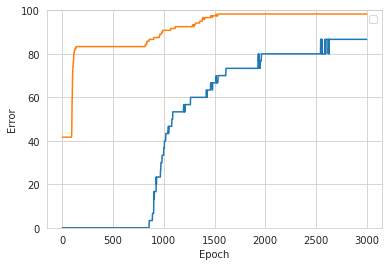

Max in test: 86.66666666666667  Max in train: 98.33333333333333


In [63]:
import tensorflow as tf
from keras import regularizers
init = tf.initialize_all_variables()
training_epochs = 3000
learning_rate = 0.1
a_test, a_train = [], []
with tf.Session() as sess:
    model = Sequential()
    init = tf.initialize_all_variables()
    model.add(Dense(3,input_dim=2,activation=tf.nn.leaky_relu))
    model.add(Dense(3,activation='softmax'))
    loss_now='categorical_crossentropy'
    optimizer_now='Adam'
    metrics_now=['accuracy']
    model.compile(loss=loss_now,optimizer=optimizer_now ,metrics=metrics_now)
    model.summary()
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        model.fit(X_train,y_train,verbose=0)
        
        prediction_train=model.predict(X_train)
        length_train=len(prediction_train)
        y_label_train=np.argmax(y_train,axis=1)
        predict_label_train=np.argmax(prediction_train,axis=1)
        accuracy_train=np.sum(y_label_train==predict_label_train)/length_train * 100
        a_train.append(accuracy_train)

        prediction_test=model.predict(X_test)
        length_test=len(prediction_test)
        y_label_test=np.argmax(y_test,axis=1)
        predict_label_test=np.argmax(prediction_test,axis=1)
        accuracy_test=np.sum(y_label_test==predict_label_test)/length_test * 100
        a_test.append(accuracy_test)

        if epoch % 100 == 0:
            print("Epoch:", '%04d' % (epoch), "acc_train=", "{:.3f}".format(accuracy_train), "acc_test=", "{:.3f}".format(accuracy_test))
            
plot_history(a_test, a_train)
print('Max in test:', a_test[np.argmax(a_test)], ' Max in train:', a_train[np.argmax(a_train)])
sess.close()
